In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import random
from scipy.special import comb
import scipy as sp

sns.set(style='ticks', color_codes = True)

In [9]:
# pmf로 표현
# 확률변수 2 ( 실책을 2번 했다~ 실제로 발생한 사건)
# 평균 한 게임당 실책을 5번했다~ 

sp.stats.poisson.pmf(k = 2, mu = 5)

0.08422433748856832

In [10]:
rvs_poisson = sp.stats.poisson.rvs(mu=5, size=1000)
np.unique(rvs_poisson)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

/Users/eunbinpark/miniconda3/envs/da/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

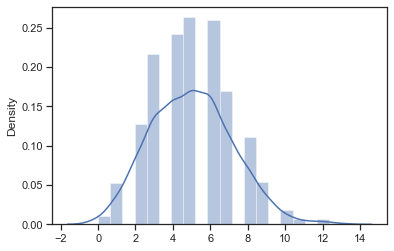

In [12]:
sns.distplot(rvs_poisson, bins=20)

### 문제 
1. 평균 실책 횟수 3회
2. 한번이라도 실책을 하는 경기를 치룰 확률은?

In [13]:
# 한 번도 실책하지 않을 확률
sp.stats.poisson.pmf(k = 0, mu = 3)

0.049787068367863944

In [14]:
1 - sp.stats.poisson.pmf(k = 0, mu = 3)

0.950212931632136

In [15]:
df = pd.read_csv('./data/football_games.csv')
df.shape

(41876, 9)

In [16]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [19]:
sk_condition = (df['home_team'].str.contains("South Korea")) |  (df['away_team'].str.contains("South Korea"))
df[sk_condition]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2921,1949-01-02,China PR,South Korea,3,2,Friendly,So Kon Po,Hong Kong,True
2923,1949-01-16,Vietnam,South Korea,3,3,Friendly,Saigon,Vietnam,False
2924,1949-01-25,Macau,South Korea,1,5,Friendly,Macau,Macau,False
3093,1950-04-16,South Korea,Chinese Taipei,3,1,Friendly,Wan Chai,Hong Kong,True
3467,1953-04-05,Hong Kong,South Korea,4,0,Friendly,So Kon Po,Hong Kong,False
...,...,...,...,...,...,...,...,...,...
41585,2019-12-11,South Korea,Hong Kong,2,0,EAFF Championship,Busan,South Korea,False
41587,2019-12-15,South Korea,China PR,1,0,EAFF Championship,Busan,South Korea,False
41589,2019-12-18,South Korea,Japan,1,0,EAFF Championship,Busan,South Korea,False
41813,2020-11-14,Mexico,South Korea,3,2,Friendly,Wiener Neustadt,Austria,True


In [30]:
df_a = df[df['home_team'].str.contains("South Korea")][['date', 'home_score']]
df_b = df[df['away_team'].str.contains("South Korea")][['date', 'away_score']]

df_korea = pd.concat([df_a, df_b])
df_korea['score'] = df_korea['away_score'].add(df_korea['home_score'], fill_value = 0)
df_korea = df_korea[['date', 'score']]

In [34]:
# 각 날짜 별 한국이 몇 골을 넣었는지에 대한 데이터
# 포아송 분포에서... 한 게임 당 3골 > 람다 3 
# 한 골이라도 넣을 확률은? 
df_korea 

,date,score
3093,1950-04-16,3.0
3468,1953-04-08,2.0
3667,1954-06-20,0.0
3946,1956-04-21,3.0
4009,1956-08-26,2.0
...,...,...
41169,2019-09-10,2.0
41365,2019-10-15,0.0
41440,2019-11-14,0.0
41547,2019-11-19,0.0


/Users/eunbinpark/miniconda3/envs/da/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score'>

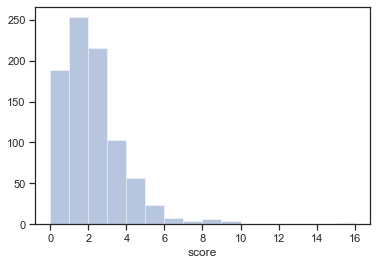

In [35]:
sns.distplot(df_korea['score'], int(df_korea['score'].max()), kde=False)

In [38]:
# 포아송 분포가 잘 맞는지 확인해야함
(df_korea['score'].value_counts(normalize = True)).sort_index()

0.0     0.218750
1.0     0.292824
2.0     0.248843
3.0     0.119213
4.0     0.065972
5.0     0.027778
6.0     0.009259
7.0     0.004630
8.0     0.006944
9.0     0.004630
16.0    0.001157
Name: score, dtype: float64

In [39]:
mu = df_korea['score'].mean()
result = list()

for k in range(0, 17): # 16골까지
    value = sp.stats.poisson.pmf(k = k, mu = mu)
    result.append(value)
    print(f"{k}\t{value}")

0	0.17297129387175522
1	0.30350055730275566
2	0.2662655352262602
3	0.15573246581906267
4	0.0683131997053527
5	0.023972872859563593
6	0.007010585504455706
7	0.0017572830067385673
8	0.0003854226039085165
9	7.514154674965426e-05
10	1.3184558434314329e-05
11	2.103092443857379e-06
12	3.075123596535291e-07
13	4.150540751733897e-08
14	5.201901272841069e-09
15	6.084940069156672e-10
16	6.673010087414279e-11


<BarContainer object of 11 artists>

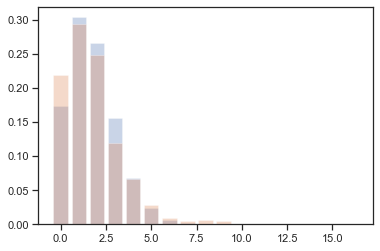

In [41]:
# 실제 값 
true_values = (df_korea['score'].value_counts(normalize=True)).sort_values()

# 포아송 분포의 프로그램의 값
plt.bar(range(0, 17), result, alpha=0.3)

plt.bar(true_values.index, true_values, alpha=0.3)

### 3골 이상 넣을 확률

In [49]:
sum(result[:3]) # ? 

0.742737386400771